In [2]:
#Import Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import sys
import glob
import shutil
import time
import json
import ipaddress
import subprocess
import socket, struct
import seaborn as sns
from numpy import array
from random import random
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


In [ ]:
import plotly.graph_objects as go

def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    
    fig.show()

In [ ]:
pip install pySankey

In [ ]:
import pandas as pd
from pySankey import sankey


In [ ]:
pip install scikit-plot


In [ ]:
import scikitplot as skplt

In [ ]:
#Import NetFlow data after conversion
netflow= pd.read_csv('/content/drive/MyDrive/Master_Thesis/Test-Netflow/Final/testdata-1-hour.csv')


In [ ]:
netflow.shape

In [ ]:
netflow.Device_Src.value_counts()

Windows                19611
Linux-Raspbian         14671
Mikrotik-BGP-Router    12698
Linux-Ubuntu            9775
SDR-RedPitaya           8447
Linux-Debian            7020
Mikrotik-Router         3632
Mikrotik-Radio          1196
VOIP                     975
Name: Device_Src, dtype: int64

In [ ]:
netflow_unknown= pd.read_csv('/content/drive/MyDrive/Master_Thesis/NetFlow_Data/NetFlow Data All/NetFlow_UnknownStreams.csv')

Datasplit according to the third criterion used for the main classification

In [ ]:
#Class-A
class_A_IP = ['44.149.43.193','44.149.43.200','44.149.43.196','44.149.43.132','44.149.43.207','44.149.43.202', '44.149.43.198','44.149.43.206','44.149.43.213','44.149.43.199','44.149.43.195']

In [ ]:
class_A = netflow[netflow.sa.isin(class_A_IP)]
class_A

In [ ]:
class_A.shape

(420381, 17)

In [ ]:
#Class-B
class_B_IP = ['44.149.43.129','44.149.43.131','44.149.43.130','44.149.43.136','44.149.43.204','44.149.43.134', '44.149.43.197','44.149.43.208','44.149.43.194','44.149.43.209','44.149.43.211']

In [ ]:
class_B = netflow[netflow.sa.isin(class_B_IP)]
class_B

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
0,44.149.43.129,44.148.230.161,8728,51672.0,TCP,5.17,24.0,5238.0,19.0,1139.0,0.0,0.0,5.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
1,44.149.43.129,44.149.43.130,0,0.0,GRE,130.13,70.0,10320.0,0.0,0.0,0.0,0.0,6.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,Mikrotik-Router
2,44.149.43.130,255.255.255.255,5678,5678.0,UDP,0.00,5.0,900.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
3,44.149.43.130,44.149.43.22,0,0.0,ICMP,0.00,4.0,208.0,4.0,208.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-Router,Unknown_Device
4,44.149.43.131,255.255.255.255,5678,5678.0,UDP,0.00,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,44.149.43.211,212.45.106.54,53094,123.0,UDP,0.00,1.0,76.0,1.0,104.0,0.0,6.0,3.0,Unassigned,Network Time Protocol (NTP),SDR-RedPitaya,Unknown_Device
3413,44.149.43.211,44.149.43.1,37564,123.0,UDP,0.00,1.0,76.0,1.0,76.0,0.0,6.0,3.0,Unassigned,Network Time Protocol (NTP),SDR-RedPitaya,Unknown_Device
3414,44.149.43.211,44.149.43.22,0,0.0,ICMP,0.00,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device
3415,44.149.43.211,44.149.43.22,22,54879.0,TCP,0.00,21.0,4285.0,21.0,4071.0,0.0,6.0,3.0,Secure Shell (SSH),Unassigned,SDR-RedPitaya,Unknown_Device


In [ ]:
class_B.shape

In [ ]:
#Class-C
class_C_IP = ['44.149.43.129','44.149.43.131','44.149.43.130','44.149.43.136','44.149.43.204','44.149.43.134', '44.149.43.197','44.149.43.208','44.149.43.194','44.149.43.209','44.149.43.211','44.149.43.203','44.149.43.210']

In [ ]:
class_C = netflow[netflow.sa.isin(class_C_IP)]
class_C

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
0,44.149.43.129,44.148.230.161,8728,51672.0,TCP,5.17,24.0,5238.0,19.0,1139.0,0.0,0.0,5.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
1,44.149.43.129,44.149.43.130,0,0.0,GRE,130.13,70.0,10320.0,0.0,0.0,0.0,0.0,6.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,Mikrotik-Router
2,44.149.43.130,255.255.255.255,5678,5678.0,UDP,0.00,5.0,900.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
3,44.149.43.130,44.149.43.22,0,0.0,ICMP,0.00,4.0,208.0,4.0,208.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-Router,Unknown_Device
4,44.149.43.131,255.255.255.255,5678,5678.0,UDP,0.00,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,44.149.43.211,212.45.106.54,53094,123.0,UDP,0.00,1.0,76.0,1.0,104.0,0.0,6.0,3.0,Unassigned,Network Time Protocol (NTP),SDR-RedPitaya,Unknown_Device
3413,44.149.43.211,44.149.43.1,37564,123.0,UDP,0.00,1.0,76.0,1.0,76.0,0.0,6.0,3.0,Unassigned,Network Time Protocol (NTP),SDR-RedPitaya,Unknown_Device
3414,44.149.43.211,44.149.43.22,0,0.0,ICMP,0.00,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device
3415,44.149.43.211,44.149.43.22,22,54879.0,TCP,0.00,21.0,4285.0,21.0,4071.0,0.0,6.0,3.0,Secure Shell (SSH),Unassigned,SDR-RedPitaya,Unknown_Device


In [ ]:
class_C.shape

In [ ]:
class_A.to_csv('Class_A.csv', index= False)
class_B.to_csv('Class_B.csv', index= False)
class_C.to_csv('Class_C.csv', index= False)

In [ ]:
test1d = pd.read_csv('/content/drive/MyDrive/Master_Thesis/Test-Netflow/Final/testdata-1-day.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])
test1h = pd.read_csv('/content/drive/MyDrive/Master_Thesis/Test-Netflow/Final/testdata-1-hour.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])

In [ ]:
classA= pd.read_csv('/content/drive/MyDrive/Master_Thesis/NetFlow_Data/NetFlow Data All/ClassA-Same-Pattern.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])
classB= pd.read_csv('/content/drive/MyDrive/Master_Thesis/NetFlow_Data/NetFlow Data All/ClassB-Same-Pattern.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])
classC= pd.read_csv('/content/drive/MyDrive/Master_Thesis/NetFlow_Data/NetFlow Data All/Class_C_Datastream.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])

In [ ]:
classA1d= pd.read_csv('/content/drive/MyDrive/Master_Thesis/Test-Netflow/Final/Class_A_1day.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])
classB1d= pd.read_csv('/content/drive/MyDrive/Master_Thesis/Test-Netflow/Final/Class_B_1day.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])
classC1d= pd.read_csv('/content/drive/MyDrive/Master_Thesis/Test-Netflow/Final/Class_C_1day.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])

In [ ]:
classA1h= pd.read_csv('/content/drive/MyDrive/Master_Thesis/Test-Netflow/Final/Class_A_1hour.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])
classB1h= pd.read_csv('/content/drive/MyDrive/Master_Thesis/Test-Netflow/Final/Class_B_1hour.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])
classC1h= pd.read_csv('/content/drive/MyDrive/Master_Thesis/Test-Netflow/Final/Class_C_1hour.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])

In [ ]:
classA1d.Device_Src.value_counts()

Linux-Raspbian         13464
Mikrotik-BGP-Router    11550
Linux-Ubuntu            7897
Linux-Debian            6411
SDR-RedPitaya           6175
Mikrotik-Router         2070
Mikrotik-Radio           599
Name: Device_Src, dtype: int64

In [ ]:
netflow.shape

(711539, 17)

EDA on Classes data

In [ ]:
plot_distribution(classA1d['Device_Src'])

In [ ]:
plot_distribution(classB1d['Device_Src'])

In [ ]:
plot_distribution(classC1d['Device_Src'])

In [ ]:
sankey.sankey(left=classA['Device_Src'], right=classA['Device_Dst'], aspect=20,fontsize=10)

To Classify devices from a new NetFlow .
- Convert the new file to a standard format.
- Assign the output packets(opkt) and output bytes(obyt) values.
- Assign the "Src_value" and "Dst_Value" from the port description.
- Train the classifiers with Class-C or "netflow_host" data to classify devices into 9 unique classes.
- Perform feature scaling and encoding on test data
- Predict with the classifiers - VC or for more comparison with ETC, KNN and DT-BC.
- Get the results of the classification
- For best classification performance on new NetFlow data without ground truth, Training the classifiers on data streams of all device classes yield best classification accuracy.

In [ ]:
#Import new test data after conversion for classification
test = pd.read_csv('/content/drive/MyDrive/Master_Thesis/Test-Netflow/Final/testdata.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value'])

In [ ]:
#Feature Scaling and encoding
le = LabelEncoder()
sc = StandardScaler()
netflow['Device_Dst'] = le.fit_transform(netflow['Device_Dst'])
netflow['Src_value'] = le.fit_transform(netflow['Src_value'])
netflow['Dst_value'] = le.fit_transform(netflow['Dst_value'])
netflow['pr'] = le.fit_transform(netflow['pr'])
netflow['Device_Src'] = le.fit_transform(netflow['Device_Src'])
# netflow = pd.get_dummies(data=netflow, columns=['pr'])

In [ ]:
# Feature Encoding for test data
test['Src_value'] = le.fit_transform(test['Src_value'])
test['Dst_value'] = le.fit_transform(test['Dst_value'])
test['pr'] = le.fit_transform(test['pr'])


In [ ]:
#Feature Scaling and encoding
le = LabelEncoder()
sc = StandardScaler()
classA['Src_value'] = le.fit_transform(classA['Src_value'])
classA['Dst_value'] = le.fit_transform(classA['Dst_value'])
classA['pr'] = le.fit_transform(classA['pr'])
classA['Device_Src'] = le.fit_transform(classA['Device_Src'])
classA1d['Src_value'] = le.fit_transform(classA1d['Src_value'])
classA1d['Dst_value'] = le.fit_transform(classA1d['Dst_value'])
classA1d['pr'] = le.fit_transform(classA1d['pr'])
classA1d['Device_Src'] = le.fit_transform(classA1d['Device_Src'])
classA1h['Src_value'] = le.fit_transform(classA1h['Src_value'])
classA1h['Dst_value'] = le.fit_transform(classA1h['Dst_value'])
classA1h['pr'] = le.fit_transform(classA1h['pr'])
classA1h['Device_Src'] = le.fit_transform(classA1h['Device_Src'])




In [ ]:
classB['Src_value'] = le.fit_transform(classB['Src_value'])
classB['Dst_value'] = le.fit_transform(classB['Dst_value'])
classB['pr'] = le.fit_transform(classB['pr'])
classB['Device_Src'] = le.fit_transform(classB['Device_Src'])
classB1d['Src_value'] = le.fit_transform(classB1d['Src_value'])
classB1d['Dst_value'] = le.fit_transform(classB1d['Dst_value'])
classB1d['pr'] = le.fit_transform(classB1d['pr'])
classB1d['Device_Src'] = le.fit_transform(classB1d['Device_Src'])
classB1h['Src_value'] = le.fit_transform(classB1h['Src_value'])
classB1h['Dst_value'] = le.fit_transform(classB1h['Dst_value'])
classB1h['pr'] = le.fit_transform(classB1h['pr'])
classB1h['Device_Src'] = le.fit_transform(classB1h['Device_Src'])

In [ ]:
classC['Src_value'] = le.fit_transform(classC['Src_value'])
classC['Dst_value'] = le.fit_transform(classC['Dst_value'])
classC['pr'] = le.fit_transform(classC['pr'])
classC['Device_Src'] = le.fit_transform(classC['Device_Src'])
classC1d['Src_value'] = le.fit_transform(classC1d['Src_value'])
classC1d['Dst_value'] = le.fit_transform(classC1d['Dst_value'])
classC1d['pr'] = le.fit_transform(classC1d['pr'])
classC1d['Device_Src'] = le.fit_transform(classC1d['Device_Src'])
classC1h['Src_value'] = le.fit_transform(classC1h['Src_value'])
classC1h['Dst_value'] = le.fit_transform(classC1h['Dst_value'])
classC1h['pr'] = le.fit_transform(classC1h['pr'])
classC1h['Device_Src'] = le.fit_transform(classC1h['Device_Src'])

In [ ]:
labels_dict = {index: value for index, value in enumerate(le.classes_)}
labels_dict

{0: 'Linux-Debian',
 1: 'Linux-Raspbian',
 2: 'Linux-Ubuntu',
 3: 'Mikrotik-BGP-Router',
 4: 'Mikrotik-Radio',
 5: 'Mikrotik-Router',
 6: 'SDR-RedPitaya',
 7: 'VOIP',
 8: 'Windows'}

In [ ]:
netflow_unknown['Device_Dst'] = le.fit_transform(netflow_unknown['Device_Dst'])
netflow_unknown['Src_value'] = le.fit_transform(netflow_unknown['Src_value'])
netflow_unknown['Dst_value'] = le.fit_transform(netflow_unknown['Dst_value'])
netflow_unknown['pr'] = le.fit_transform(netflow_unknown['pr'])
netflow_unknown['Device_Src'] = le.fit_transform(netflow_unknown['Device_Src'])

In [ ]:
#Normalisation
scaling = MinMaxScaler()
netflow[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(netflow[['td','ipkt','ibyt','opkt','obyt','in','out']])
netflow_unknown[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(netflow_unknown[['td','ipkt','ibyt','opkt','obyt','in','out']])
classA[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(classA[['td','ipkt','ibyt','opkt','obyt','in','out']])
classB[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(classB[['td','ipkt','ibyt','opkt','obyt','in','out']])
classC[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(classC[['td','ipkt','ibyt','opkt','obyt','in','out']])

In [ ]:
#Standardization
sc = StandardScaler()
netflow[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(netflow[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classA[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classA[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classB[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classB[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classC[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classC[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']])
netflow_unknown[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(netflow_unknown[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']])

In [ ]:
#Perform standardization on test data
test[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(test[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']])

In [ ]:
#Standardization
sc = StandardScaler()
test1d[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(test1d[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']])
test1h[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(test1h[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classA[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classA[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classB[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classB[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classC[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classC[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classA1d[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classA1d[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classB1d[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classB1d[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classC1d[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classC1d[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classA1h[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classA1h[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classB1h[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classB1h[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']])
classC1h[['td','stos', 'ipkt','ibyt','opkt','obyt','in','out']] = sc.fit_transform(classC1h[['td', 'stos', 'ipkt','ibyt','opkt','obyt','in','out']])

In [ ]:
classA1d.head(50)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src
0,44.149.43.132,44.132.28.65,4520,4520.0,2,-0.142209,-0.164094,-0.253449,0.077734,-0.041652,-0.159482,0.522609,0.259105,13,17,2
1,44.149.43.132,44.143.102.147,5060,5060.0,2,-0.074572,-0.109622,-0.070705,0.154112,2.779736,-0.159482,0.522609,0.691151,19,22,2
2,44.149.43.132,44.143.40.30,4520,4520.0,2,-0.148153,-0.195220,-0.256639,-0.125940,-0.241587,-0.159482,0.522609,0.691151,13,17,2
3,44.149.43.132,44.148.237.1,0,0.0,0,-0.148153,-0.226347,-0.258602,-0.227777,-0.272151,-0.159482,0.522609,0.691151,12,14,2
4,44.149.43.132,44.149.124.4,4520,4520.0,2,0.117814,0.100482,-0.228663,0.434164,0.010561,-0.159482,0.522609,0.259105,13,17,2
5,44.149.43.132,44.149.166.36,4520,4520.0,2,-0.148153,-0.195220,-0.256639,-0.125940,-0.241587,-0.159482,0.522609,0.259105,13,17,2
6,44.149.43.132,44.149.42.4,4520,4520.0,2,7.081337,6.847170,0.409631,-0.253236,-0.298894,-0.159482,0.522609,-0.172940,13,17,2
7,44.149.43.132,44.149.43.129,123,123.0,2,-0.148153,-0.203002,-0.254103,-0.253236,-0.298894,6.370802,0.522609,-1.469077,15,18,2
8,44.149.43.132,44.149.43.203,5060,5062.0,2,-0.148153,-0.156312,-0.137209,0.510542,1.081555,-0.159482,0.522609,-0.172940,19,16,2
9,44.149.43.132,44.149.43.21,4520,4520.0,2,0.024272,-0.156312,-0.252958,0.001356,-0.184281,-0.159482,0.522609,-0.172940,13,17,2


In [ ]:
classB1d.head(50)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src
0,44.149.43.129,44.148.230.161,8728,45204.0,2,-0.149611,-0.064323,-0.195889,-0.007832,-0.034911,-0.269401,-2.043207,0.641961,8,10,3
1,44.149.43.129,44.148.237.1,0,0.0,1,-0.119281,-0.191272,-0.381833,-0.143709,-0.064305,-0.269401,-2.043207,0.641961,4,7,3
2,44.149.43.129,44.149.43.130,0,0.0,0,0.706017,0.625618,0.213294,13.832219,6.339898,-0.269401,-2.043207,1.003796,4,7,3
3,44.149.43.129,44.149.43.134,53,37500.0,3,-0.166623,-0.196792,-0.384230,-0.150180,-0.066724,-0.269401,-2.043207,1.003796,1,10,3
4,44.149.43.129,44.149.43.134,53,42264.0,3,-0.166623,-0.196792,-0.384686,-0.150180,-0.066724,-0.269401,-2.043207,1.003796,1,10,3
5,44.149.43.129,44.149.43.188,53,33531.0,3,-0.166623,-0.196792,-0.384258,-0.150180,-0.066748,-0.269401,-2.043207,3.536639,1,10,3
6,44.149.43.129,44.149.43.188,53,39112.0,3,-0.166623,-0.196792,-0.384258,-0.150180,-0.066748,-0.269401,-2.043207,3.536639,1,10,3
7,44.149.43.129,44.149.43.188,53,39633.0,3,-0.166623,-0.196792,-0.384258,-0.150180,-0.066748,-0.269401,-2.043207,3.536639,1,10,3
8,44.149.43.129,44.149.43.188,53,41381.0,3,-0.166623,-0.196792,-0.384715,-0.150180,-0.066748,-0.269401,-2.043207,3.536639,1,10,3
9,44.149.43.129,44.149.43.188,53,42945.0,3,-0.166623,-0.196792,-0.384258,-0.150180,-0.066748,-0.269401,-2.043207,3.536639,1,10,3


In [ ]:
netflow.head(50)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
0,44.149.43.129,44.148.230.161,8728,41242,2,-0.102223,0.003577,-0.016382,0.034764,-0.013009,-0.127999,-2.126811,0.401835,40,73,3,6
1,44.149.43.129,44.148.230.161,8728,40182,2,-0.102660,0.003577,-0.016368,0.039581,-0.011782,-0.127999,-2.126811,0.401835,40,73,3,6
2,44.149.43.129,44.148.230.161,8728,39596,2,-0.096161,0.003577,-0.016368,0.034764,-0.013009,-0.127999,-2.126811,0.401835,40,73,3,6
3,44.149.43.129,44.148.230.161,8728,38992,2,-0.089760,0.003577,-0.016368,0.034764,-0.013009,-0.127999,-2.126811,0.401835,40,73,3,6
4,44.149.43.129,44.148.230.161,8728,38316,2,-0.102660,0.003577,-0.016374,0.039581,-0.011782,-0.127999,-2.126811,0.401835,40,73,3,6
5,44.149.43.129,44.148.230.161,8728,37404,2,-0.102223,0.003577,-0.016377,0.034764,-0.013009,-0.127999,-2.126811,0.401835,40,73,3,6
6,44.149.43.129,44.148.230.161,8728,35944,2,-0.102660,0.003577,-0.016374,0.039581,-0.011782,-0.127999,-2.126811,0.401835,40,73,3,6
7,44.149.43.129,44.148.230.161,8728,37442,2,-0.101641,0.003577,-0.016374,0.039581,-0.011782,-0.127999,-2.126811,0.401835,40,73,3,6
8,44.149.43.129,44.148.230.161,8728,38778,2,-0.102466,0.003577,-0.016368,0.039581,-0.011782,-0.127999,-2.126811,0.401835,40,73,3,6
9,44.149.43.129,44.148.230.161,8728,38246,2,-0.102660,0.003577,-0.016379,0.034764,-0.013009,-0.127999,-2.126811,0.401835,40,73,3,6


In [ ]:
x1 = classA.drop(['sa', 'da', 'Device_Src'],axis=1)
y1 = classA['Device_Src']

In [ ]:
x2 = classB.drop(['sa', 'da', 'Device_Src'],axis=1)
y2 = classB['Device_Src']

In [ ]:
#Assign Input values for test data
x2 = classB.drop(['sa', 'da'],axis=1)

In [ ]:
x3 = classC.drop(['sa', 'da', 'Device_Src'],axis=1)
y3 = classC['Device_Src']

In [ ]:
x4 = classA1d.drop(['sa', 'da', 'Device_Src'],axis=1)
y4 = classA1d['Device_Src']

In [ ]:
x5 = classB1d.drop(['sa', 'da', 'Device_Src'],axis=1)
y5 = classB1d['Device_Src']

In [ ]:
x6 = classC1d.drop(['sa', 'da', 'Device_Src'],axis=1)
y6 = classC1d['Device_Src']

In [ ]:
x7 = classA1h.drop(['sa', 'da', 'Device_Src'],axis=1)
y7 = classA1h['Device_Src']

In [ ]:
x8 = classB1h.drop(['sa', 'da', 'Device_Src'],axis=1)
y8 = classB1h['Device_Src']

In [ ]:
x9 = classC1h.drop(['sa', 'da', 'Device_Src'],axis=1)
y9 = classC1h['Device_Src']

In [ ]:
x10 = test1d.drop(['sa', 'da', 'Device_Src'],axis=1)
y10 = test1d['Device_Src']

In [ ]:
x11 = test1h.drop(['sa', 'da', 'Device_Src'],axis=1)
y11 = test1h['Device_Src']

In [ ]:
x5 = netflow_unknown.drop(['sa', 'da', 'Device_Src','Device_Dst'],axis=1)
y5 = netflow_unknown['Device_Src']

In [ ]:
#Splitting the dataset into Train and testing dataset
x4_train,x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.40, random_state=42)
x5_train,x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.40, random_state=42)

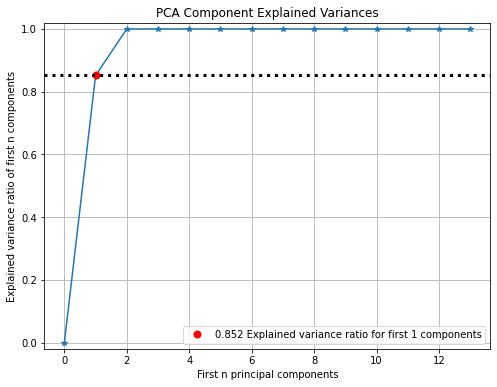

In [ ]:
pca = PCA(random_state=1)
pca.fit(x1)
skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6));

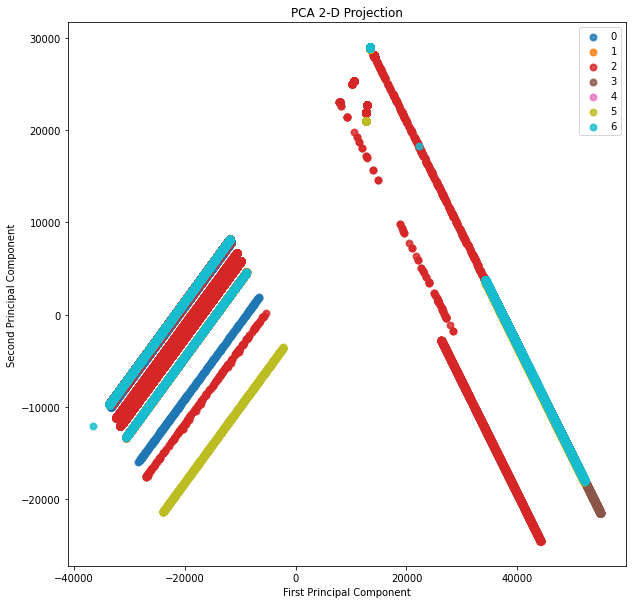

In [ ]:
skplt.decomposition.plot_pca_2d_projection(pca, x1, y1,
                                           figsize=(10,10),
                                           cmap="tab10");

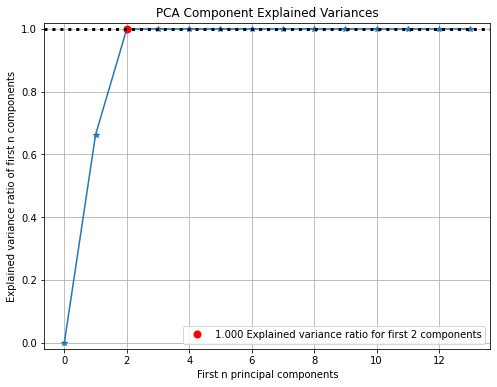

In [ ]:
pca = PCA(random_state=1)
pca.fit(x2)
skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6));

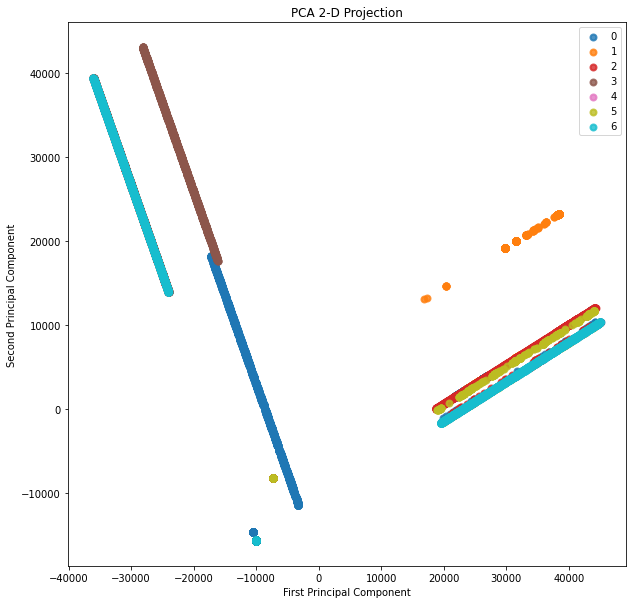

In [ ]:
skplt.decomposition.plot_pca_2d_projection(pca, x2, y2,
                                           figsize=(10,10),
                                           cmap="tab10");

In [ ]:
#Model 1 - K-NN 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x1, y1)
print("Accuracy:",knn.score(x2, y2)*100)


Accuracy: 31.343283582089555


In [ ]:
predKNN = knn.predict(x2)
predknn_df = pd.DataFrame()
predknn_df['KNN'] = predKNN
predknn_df['KNN'] = predknn_df['KNN'].map(labels_dict)
test['KNN'] = predknn_df['KNN']

In [ ]:
#Model- 2 - Decision Trees
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x1, y1)
print("Accuracy:",dt.score(x2, y2)*100)

In [ ]:
predDT = dt.predict(x2)
predDT_df = pd.DataFrame()
predDT_df['DT'] = predDT
predDT_df['DT'] = predDT_df['DT'].map(labels_dict)
test['DT'] = predDT_df['DT']

In [ ]:
#Model-3 - DT-BC
bcdt = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=250,
    max_samples=100, bootstrap=True)
bcdt.fit(x1,y1)
bcdt.score(x2,y2)

0.24378109452736318

In [ ]:
predDT_BC = bcdt.predict(x2)
preddtbc_df = pd.DataFrame()
preddtbc_df['DT-BC'] = predDT_BC
preddtbc_df['DT-BC'] = preddtbc_df['DT-BC'].map(labels_dict)
test['DT-BC'] = preddtbc_df['DT-BC']


In [ ]:
#Model 4 - ETC
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x1,y1)
etc.score(x2,y2)

In [ ]:
predETC = etc.predict(x2)
predetc_df = pd.DataFrame()
predetc_df['ETC'] = predETC
predetc_df['ETC'] = predetc_df['ETC'].map(labels_dict)
test['ETC'] = predetc_df['ETC']


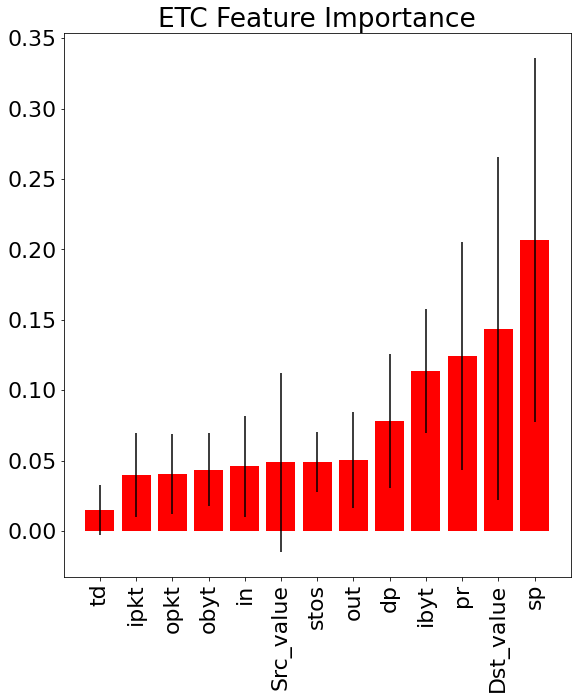

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams.update({'font.size': 22})

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(etc, feature_names=x1.columns,
                                         title="ETC Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

In [ ]:
#Model 5 - Random Forest
rf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy')
rf.fit(x1, y1)
print("Accuracy:",rf.score(x2, y2)*100)

In [ ]:
predRF = rf.predict(x2)
predrf_df = pd.DataFrame()
predrf_df['RF'] = predRF
predrf_df['RF'] = predrf_df['RF'].map(labels_dict)
test['RF'] = predrf_df['RF']


In [ ]:
bgrf = BaggingClassifier(RandomForestClassifier())
bgrf.fit(x1,y1)
bgrf.score(x2,y2)

0.7876038633619772

In [ ]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(rf, feature_names=x1.columns,
                                         title="Random Forest Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

In [ ]:
#Model -6 - XGBoost
xgbc = XGBClassifier()
xgbc.fit(x1, y1)
print("Accuracy:",xgbc.score(x2, y2)*100)

In [ ]:
predXGBC = xgbc.predict(x2)
predxgbc_df = pd.DataFrame()
predxgbc_df['XGBC'] = predXGBC
predxgbc_df['XGBC'] = predxgbc_df['XGBC'].map(labels_dict)
test['XGBC'] = predxgbc_df['XGBC']


In [ ]:
#Model - 7 - SVM Kernel
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(x1, y1)
print("Accuracy:",svm.score(x2, y2)*100)

In [ ]:
predSVM = svm.predict(x2)
predsvm_df = pd.DataFrame()
predsvm_df['SVM'] = predSVM
predsvm_df['SVM'] = predsvm_df['SVM'].map(Label_encode)
test['SVM'] = predxgbc_df['XGBC']


In [ ]:
#Model 8 - MLP
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(x1, y1)

MLPClassifier(alpha=1, max_iter=1000)

In [ ]:
mlp.score(x2,y2)

In [ ]:
predMLP = mlp.predict(x2)
predmlp_df = pd.DataFrame()
predmlp_df['MLP'] = predMLP
predmlp_df['MLP'] = predmlp_df['MLP'].map(labels_dict)
test['MLP'] = predmlp_df['MLP']


In [ ]:
#Model 9- Voting Classifier
vc = VotingClassifier( estimators= [('etc',etc),('bcdt',bcdt),('knn',knn)], voting = 'hard')

In [ ]:
vc.fit(x1,y1)

VotingClassifier(estimators=[('etc', ExtraTreesClassifier(random_state=0)),
                             ('bcdt',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                max_samples=100,
                                                n_estimators=250)),
                             ('knn', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
vc.score(x2,y2)

0.2479240806642942

In [ ]:
predVC = vc.predict(x2)
predvc_df = pd.DataFrame()
predvc_df['VC'] = predVC
predvc_df['VC'] = predvc_df['VC'].map(labels_dict)
test['VC'] = predvc_df['VC']


In [ ]:
estimator_list = [
    ('knn',knn),
    ('etc',etc),
    ('bcdt',bcdt)]

In [ ]:
sc = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

In [ ]:
sc.fit(x1, y1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
sc.score(x2,y2)

In [ ]:
predSC = sc.predict(x2)
predsc_df = pd.DataFrame()
predsc_df['SC'] = predSC
predsc_df['SC'] = predsc_df['SC'].map(labels_dict)
test['SC'] = predsc_df['SC']


In [9]:
#Result Type 1 - Get Device classification of each IP address in Probabilities
#Get device classification in probabilities for each IP address
Classification_probability = test.VC.groupby(test.sa).value_counts(normalize=True)*100
print(Classification_probability)

sa             VC                 
44.149.43.129  Mikrotik-BGP-Router    93.564976
               Linux-Ubuntu            6.379430
               Linux-Raspbian          0.055594
44.149.43.130  Linux-Ubuntu           56.397638
               Mikrotik-Router        37.480315
               Linux-Raspbian          6.122047
44.149.43.131  Linux-Ubuntu           66.342240
               Mikrotik-Router        33.622368
               Linux-Raspbian          0.035392
44.149.43.134  Linux-Ubuntu           99.567773
               Mikrotik-Router         0.432227
44.149.43.136  Linux-Ubuntu           81.033764
               Linux-Raspbian         14.922885
               Linux-Debian            4.043351
44.149.43.194  Linux-Ubuntu           49.218401
               Mikrotik-Router        47.565878
               Mikrotik-BGP-Router     3.215721
44.149.43.197  SDR-RedPitaya          67.109248
               Linux-Ubuntu           30.875844
               Linux-Raspbian          2.014908
44.14

In [11]:
Classification_probability.to_csv('Class-C-Result.csv', index= False)

In [ ]:
#Result-Type-2- Get the predictions for each flows
test.to_csv('test-result-1.csv', index= False)

In [ ]:
#Result-Type-3
test-result = pd.DataFrame({
     "Device_Ip":list(test["sa"]),
     "predKNN":list(predKNN),
     "predDT":list(predDT),
     "predDT_BC":list(predDT_BC),
     "predETC":list(predETC),
     "predRF":list(predRF),
     "predXGBC":list(predXGBC),
     "probaSVM":list(predSVM),
     "predMLP":list(predMLP),
     "predVC":list(predVC),
     "predSC":list(predSC),
     })

test-result.to_csv("test-result-2.csv", 
          index=False)

In [ ]:
#To get flow wise predictions of ClassB data used for testing
classB['Device_Src'] = classB['Device_Src'].map(labels_dict)
classB.to_csv("classB-result.csv", index=False)